In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [12]:
file_path = 'Apr_2023.csv'
df = pd.read_csv(file_path)

In [13]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y/%m/%d %H:%M:%S', errors='coerce')
df = df[~((df['Timestamp'].dt.month == 4) & (df['Timestamp'].dt.day == 31))]
df = df.dropna(subset=['Timestamp'])

df['Time_seconds'] = (df['Timestamp'] - df['Timestamp'].min()).dt.total_seconds()
time = df['Time_seconds']
voltage = df['Island_mode_MCCB_AC_Voltage']

In [14]:
time_reshaped = np.array(time).reshape(-1, 1) # reshape the data as a column

In [15]:
model = LinearRegression()
model.fit(time_reshaped, voltage)

LinearRegression()

In [16]:
voltage_pred = model.predict(time_reshaped)

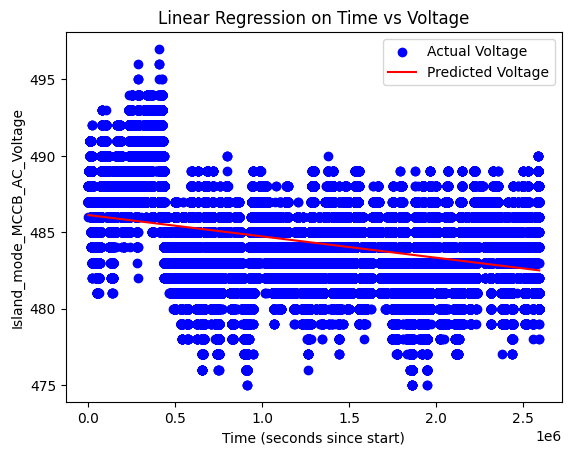

In [21]:
plt.scatter(time, voltage, color='blue', label='Actual Voltage')
plt.plot(time, voltage_pred, color='red', label='Predicted Voltage')
plt.xlabel('Time (seconds since start)')
plt.ylabel('Island_mode_MCCB_AC_Voltage')
plt.legend()
plt.title('Linear Regression on Time vs Voltage')
plt.show()